# <center>Accessing SQL Server from Python with ODBC </center>
links:
    
https://blogs.msdn.microsoft.com/cdndevs/2015/03/11/python-and-data-sql-server-as-a-data-source-for-python-applications/
    
https://tomaztsql.wordpress.com/2018/07/15/using-python-pandas-dataframe-to-read-and-insert-data-to-microsoft-sql-server/

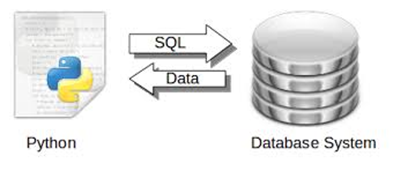

In [1]:
import pyodbc
import pandas as pd

pg_conn = pyodbc.connect("DRIVER={PostgreSQL ODBC Driver(UNICODE)};"
                          "SERVER=localhost;"
                          "DATABASE=Development;"
                          "Trusted_Connection=yes;"
                          "uid=bryan;pwd=bryan") 

query = '''SELECT * FROM person'''
                 
df = pd.read_sql(query, pg_conn)

print(df.head(3))

print(type(df))

   ID FirstName LastName Prefix              Address1 Address2       City  \
0   1       Tom     Toms    Mr.        23 Drum Street              Ludwig   
1   2      Mary    Jones         15 Mocking Bird Lane   Apt 22  Worcester   
2   3       Bob   Miller              35 Smith Street              Boston   

  StateCD  ZipCD  
0      PA   1234  
1      MA  99999  
2      MA  99999  
<class 'pandas.core.frame.DataFrame'>


In [7]:
# Windows integrated security.
# SQL Native driver...

import pyodbc

cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server={DESKTOP-TG2VLSU\SQL2017};"
                      "Database=AdventureWorks2017;"
                      "Trusted_Connection=yes;")

cursor = cnxn.cursor()

cursor.execute('SELECT top 2 * FROM Person.Person')

for row in cursor:
    print('row = %r' % (row,))

row = (1, 'EM', False, None, 'Ken', 'J', 'Sánchez', None, 0, None, '<IndividualSurvey xmlns="http://schemas.microsoft.com/sqlserver/2004/07/adventure-works/IndividualSurvey"><TotalPurchaseYTD>0</TotalPurchaseYTD></IndividualSurvey>', '92C4279F-1207-48A3-8448-4636514EB7E2', datetime.datetime(2009, 1, 7, 0, 0))
row = (2, 'EM', False, None, 'Terri', 'Lee', 'Duffy', None, 1, None, '<IndividualSurvey xmlns="http://schemas.microsoft.com/sqlserver/2004/07/adventure-works/IndividualSurvey"><TotalPurchaseYTD>0</TotalPurchaseYTD></IndividualSurvey>', 'D8763459-8AA8-47CC-AFF7-C9079AF79033', datetime.datetime(2008, 1, 24, 0, 0))


In [8]:
## From SQL to DataFrame Pandas
#  Use tripple quotes ''' to write a multipline query.
import pandas as pd
import pyodbc

sql_conn = pyodbc.connect("DRIVER={ODBC Driver 13 for SQL Server};"
                          "SERVER=DESKTOP-TG2VLSU\SQL2017;"
                          "DATABASE=AdventureWorks2017;"
                          "Trusted_Connection=yes;") 

query = '''SELECT top 5 * 
           FROM Person.Person'''
                 
df = pd.read_sql(query, sql_conn)

print(df.head(3))

print(type(df))


   BusinessEntityID PersonType  NameStyle Title FirstName MiddleName  \
0                 1         EM      False  None       Ken          J   
1                 2         EM      False  None     Terri        Lee   
2                 3         EM      False  None   Roberto       None   

     LastName Suffix  EmailPromotion AdditionalContactInfo  \
0     Sánchez   None               0                  None   
1       Duffy   None               1                  None   
2  Tamburello   None               0                  None   

                                        Demographics  \
0  <IndividualSurvey xmlns="http://schemas.micros...   
1  <IndividualSurvey xmlns="http://schemas.micros...   
2  <IndividualSurvey xmlns="http://schemas.micros...   

                                rowguid ModifiedDate  
0  92C4279F-1207-48A3-8448-4636514EB7E2   2009-01-07  
1  D8763459-8AA8-47CC-AFF7-C9079AF79033   2008-01-24  
2  E1A2555E-0828-434B-A33B-6F38136A37DE   2007-11-04  
<class 'pandas.co

In [ ]:
# using credentials...

sql_conn2 = pyodbc.connect("DRIVER={ODBC Driver 13 for SQL Server};"
                          "SERVER=localhost\MSSQLServer01;"
                          "DATABASE=AdventureWorks2017;"
                          "Trusted_Connection=yes;"
                          "uid=bryant;pwd=bryantuser123") 


query = '''SELECT top 5 * FROM Person.Person'''
                 
df = pd.read_sql(query, sql_conn)

print(df.head(3))

print(type(df))

In [ ]:
## From SQL to DataFrame Pandas
import pandas as pd
import pyodbc

# Windows integrated security...

sql_conn = pyodbc.connect("DRIVER={ODBC Driver 13 for SQL Server};"
                          "SERVER=DESKTOP-TG2VLSU\SQL2017;"
                          "DATABASE=AdventureWorksDW2017;"
                          "Trusted_Connection=yes;") 


query = '''SELECT DateKey, CalendarYear FROM dbo.DiMDate'''
                 
df = pd.read_sql(query, sql_conn)

print(df.head(3))

print('Object type is: ', type(df))

## Using SQL Server credentials based security

In [10]:
# using credentials...
sql_conn2 = pyodbc.connect("DRIVER={ODBC Driver 13 for SQL Server};"
                          "SERVER=DESKTOP-TG2VLSU\SQL2017;"
                          "DATABASE=AdventureWorksDW2017;"
                          "Trusted_Connection=yes;"
                          "uid=Bryan;pwd=bryan") 

# Note we can use T-sQL syntax...
query = '''SELECT top 2 DateKey, DayNumberOfWeek, EnglishMonthName as MonthName FROM dbo.DiMDate'''
                 
df = pd.read_sql(query, sql_conn)

print(df)

    DateKey  DayNumberOfWeek MonthName
0  20050101                7   January
1  20050102                1   January


In [11]:
sqlservername = 'DESKTOP-TG2VLSU\SQL2017'

# A Better Way...

## We'll create a reusable function that will return query results to us.
## This will use Windows Authenticiation.

In [12]:
import pyodbc
import pandas as pd

def get_db_data_is(sqlstatement, 
                driver = "{ODBC Driver 13 for SQL Server}",
                server = sqlservername,
                database = "AdventureWorksDW2017"):
    
    '''
        get_db_data takes a SQL query as input and returns a result
    
        arguments:
        
            sqlstatement = query you want to execute
            driver = database driver to use
            server = database server name
            database = database name 
    '''

    conn = pyodbc.connect("Driver=" + driver + ";"
                          "Server=" + server + ";"
                          "Database=" + database + ";"
                          "Trusted_Connection=yes;")

    cur = conn.cursor()
    
    # result = cur.execute(sqlstatement).fetchall()
    
    result = pd.read_sql(sqlstatement, conn)
    
    # cur.close()
    conn.close()
    
    return result

In [13]:
dfdate = get_db_data_is('select top 3 * from dbo.DimDate')
dfdate.head(3)

,DateKey,FullDateAlternateKey,DayNumberOfWeek,EnglishDayNameOfWeek,SpanishDayNameOfWeek,FrenchDayNameOfWeek,DayNumberOfMonth,DayNumberOfYear,WeekNumberOfYear,EnglishMonthName,SpanishMonthName,FrenchMonthName,MonthNumberOfYear,CalendarQuarter,CalendarYear,CalendarSemester,FiscalQuarter,FiscalYear,FiscalSemester
0,20050101,2005-01-01,7,Saturday,Sábado,Samedi,1,1,1,January,Enero,Janvier,1,1,2005,1,3,2005,2
1,20050102,2005-01-02,1,Sunday,Domingo,Dimanche,2,2,2,January,Enero,Janvier,1,1,2005,1,3,2005,2
2,20050103,2005-01-03,2,Monday,Lunes,Lundi,3,3,2,January,Enero,Janvier,1,1,2005,1,3,2005,2


## Sometimes we need database authentication and we may want to query
## a non SQL Server database so let's have a function version that does that.

In [20]:
import pyodbc
import pandas as pd

def get_db_data_da(sqlstatement, 
                driver = "{ODBC Driver 13 for SQL Server}",
                server = sqlservername,
                userid = 'Bryan',
                pw = 'bryan', # Don't do this!!!
                database = "AdventureWorksDW2017"):
    
    '''
        get_db_data takes a SQL query as input and returns a result
    
        arguments:
        
            sqlstatement = query you want to execute
            driver = database driver to use
            server = database server name
            database = database name 
    '''

    conn = pyodbc.connect("Driver=" + driver + ";"
                          "Server=" + server + ";"
                          "Database=" + database + ";"
                          "Trusted_Connection=yes;"
                          "uid=" + userid + ";" 
                          "pwd=" + pw + ";")

    cur = conn.cursor()
    
    # result = cur.execute(sqlstatement).fetchall()
    
    result = pd.read_sql(sqlstatement, conn)
    
    # cur.close()
    conn.close()
    
    return result

# Let's try it out...

In [15]:
sql = '''
SELECT EnglishProductCategoryName as Category,
       sc.EnglishProductSubcategoryName as SubCat,
       p.EnglishProductName as Product,
       SUM(SalesAmount) as SalesAmount
FROM dbo.FactInternetSales          s
JOIN  dbo.DimProduct                p
  on (s.ProductKey = p.ProductKey) 
JOIN dbo.DimProductSubcategory      sc
  ON (p.ProductSubcategoryKey = sc.ProductSubcategoryKey)
JOIN dbo.DimProductCategory         pc
  ON (sc.ProductCategoryKey = pc.ProductCategoryKey)
GROUP BY EnglishProductCategoryName, 
         EnglishProductSubcategoryName,
         EnglishProductName

'''

## Integrated security first...

In [16]:
dfsalessum = get_db_data_is(sql)
dfsalessum.head()

,Category,SubCat,Product,SalesAmount
0,Accessories,Bike Racks,Hitch Rack - 4-Bike,39360.00
1,Accessories,Bike Stands,All-Purpose Bike Stand,39591.00
2,Accessories,Bottles and Cages,Mountain Bottle Cage,20229.75
3,Accessories,Bottles and Cages,Road Bottle Cage,15390.88
4,Accessories,Bottles and Cages,Water Bottle - 30 oz.,21177.56


## Now, let's do database authentication...

In [21]:
dfsalessum = get_db_data_da(sql)
dfsalessum.head()

,Category,SubCat,Product,SalesAmount
0,Accessories,Bike Racks,Hitch Rack - 4-Bike,39360.00
1,Accessories,Bike Stands,All-Purpose Bike Stand,39591.00
2,Accessories,Bottles and Cages,Mountain Bottle Cage,20229.75
3,Accessories,Bottles and Cages,Road Bottle Cage,15390.88
4,Accessories,Bottles and Cages,Water Bottle - 30 oz.,21177.56


## Let's use the function to query a PostgreSQL database...

In [24]:
dfdate = get_db_data_da(driver = "{PostgreSQL ODBC Driver(UNICODE)}", 
                        server='localhost',
                     database = 'Development',
                    userid = 'bryan',
                      pw = 'bryan',
                     sqlstatement = 'select * from person')

In [25]:
dfdate

,ID,FirstName,LastName,Prefix,Address1,Address2,City,StateCD,ZipCD
0,1,Tom,Toms,Mr.,23 Drum Street,,Ludwig,PA,1234
1,2,Mary,Jones,,15 Mocking Bird Lane,Apt 22,Worcester,MA,99999
2,3,Bob,Miller,,35 Smith Street,,Boston,MA,99999
3,4,Robin,Gomez,,42 Universe Street,,Boston,MA,99999
